Step 1 : Understand the problem
Goal: Predict whether a passanger survived or not, based on features like age , sex, ticket class etc.
Target variable : Survived (0 = No, 1 = Yes)

Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 2 : Load the dataset

In [9]:
dataset = pd.read_csv('/content/titanic.csv')


Step 3 : EDA

In [10]:
dataset.info()
dataset.describe()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='Age'>

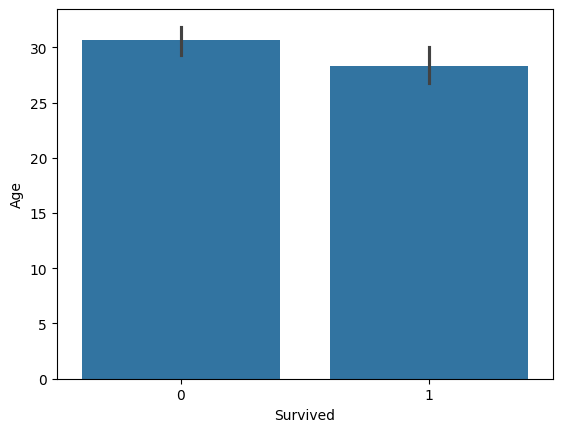

In [12]:
sns.barplot(x='Survived', y='Age', data=dataset)

Step 4 : Data Preprocessing

In [13]:
# handling missing values and convert categorical data into numeric data
# fill missing age with median
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
# fill missing Embarked with mode
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
# drop cabin col
dataset.drop('Cabin', axis=1, inplace=True)
# drop ticket col and name col
dataset.drop(['Ticket', 'Name'], axis=1, inplace=True)
# convert sex to numeric
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
# convert embarked to numeric
dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


<ipython-input-13-32f5570be7bc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
<ipython-input-13-32f5570be7bc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Step 5 : Feature Selection


In [14]:
# feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = dataset[features]
y = dataset[target]

Step 6 : Train-Test Split


In [15]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

Step 7 : Train the model

In [26]:
# train the model using Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 8 : Evaluate the model


In [27]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("******************************************************")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("******************************************************")
print('Classification Report:\n', classification_report(y_test, y_pred))
print("******************************************************")


Accuracy: 0.8268156424581006
******************************************************
Confusion Matrix:
 [[92 13]
 [18 56]]
******************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

******************************************************


Step 10 : Save model and project files

In [28]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']